In [1]:
from pyGDM2 import structures
from pyGDM2 import materials
from pyGDM2 import fields
from pyGDM2 import propagators
from pyGDM2 import core
from pyGDM2 import linear
from pyGDM2 import tools
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
length = 200 # in nm
height = 10 # in nm
step = 10 # in nm
geometry = structures.polygon(step, {"N":3, "S":length/step}, H=height/step, mesh='hex')

material = materials.gold()
struct = structures.struct(step, geometry, material)

field_generator = fields.plane_wave
wavelengths = np.linspace(400, 900, 101)
field_kwargs = dict(theta=[0], inc_angle=180)

efield = fields.efield(field_generator, wavelengths=wavelengths, kwargs=field_kwargs)
n1 = n2 = 1.33
dyads = propagators.DyadsQuasistatic123(n1=n1, n2=n2)
sim = core.simulation(struct, efield, dyads)

structure initialization - automatic mesh detection: hex
structure initialization - consistency check: 1261/1261 dipoles valid


In [3]:
## --- run the simulation
sim.scatter()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


timing for wl=400.00nm - setup: EE 2637.1ms, inv.: 1267.3ms, repropa.: 363.6ms (1 field configs), tot: 4268.3ms
timing for wl=405.00nm - setup: EE 104.8ms, inv.: 1231.6ms, repropa.: 38.1ms (1 field configs), tot: 1374.7ms
timing for wl=410.00nm - setup: EE 108.2ms, inv.: 1203.2ms, repropa.: 34.6ms (1 field configs), tot: 1346.3ms
timing for wl=415.00nm - setup: EE 110.4ms, inv.: 1308.1ms, repropa.: 34.7ms (1 field configs), tot: 1453.4ms
timing for wl=420.00nm - setup: EE 113.6ms, inv.: 1282.6ms, repropa.: 40.9ms (1 field configs), tot: 1437.3ms
timing for wl=425.00nm - setup: EE 130.4ms, inv.: 1338.7ms, repropa.: 36.5ms (1 field configs), tot: 1505.9ms
timing for wl=430.00nm - setup: EE 104.5ms, inv.: 1296.1ms, repropa.: 37.7ms (1 field configs), tot: 1438.4ms
timing for wl=435.00nm - setup: EE 145.9ms, inv.: 1289.0ms, repropa.: 34.5ms (1 field configs), tot: 1469.7ms
timing for wl=440.00nm - setup: EE 109.6ms, inv.: 1280.3ms, repropa.: 35.9ms (1 field configs), tot: 1425.9ms
timing f

1

In [4]:
field_kwargs = tools.get_possible_field_params_spectra(sim)
for i, conf in enumerate(field_kwargs):
    print("config", i, ":", conf)

config 0 : {'inc_angle': 180, 'theta': 0}


In [5]:
wl, spectrum = tools.calculate_spectrum(sim, field_kwargs[0], linear.extinct)
area_geom = tools.get_geometric_cross_section(sim)

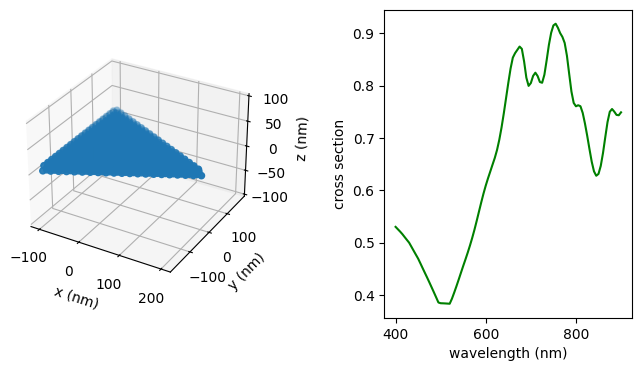

In [6]:
fig = plt.figure(figsize=(4*2, 4))
fig.subplots_adjust(wspace=0.5)
ax = fig.add_subplot(1,2,1, projection="3d")

ax.scatter(geometry[:,0], geometry[:,1], geometry[:,2])
ax.set_xlabel("x (nm)")
ax.set_ylabel("y (nm)")
ax.set_zlabel("z (nm)")
ax.axes.set_zlim3d(bottom=-100.0, top=100.0)

ax = fig.add_subplot(1,2,2)
ax.plot(wl, spectrum.T[0]/area_geom, 'g-', label='ext.')
ax.set_xlabel("wavelength (nm)")
ax.set_ylabel("cross section")
plt.savefig("./traingle.png")
plt.show()

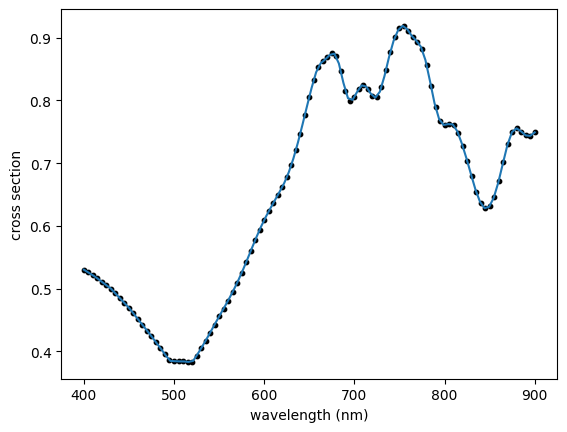

In [7]:
from scipy.interpolate import splev, splrep

y = spectrum.T[0]/area_geom
spline = splrep(wl, y)
xt = np.linspace(400, 900, 100) # upsample to 100 points
yt = splev(xt, spline)

fig, ax = plt.subplots()
ax.scatter(wl, y, s=10, color='k')
ax.plot(xt, yt)
ax.set_xlabel("wavelength (nm)")
ax.set_ylabel("cross section")
plt.show()

In [8]:
np.savez("./target_triangle.npz", y=yt, x=xt)